In [1]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


First 5 Rows
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24,

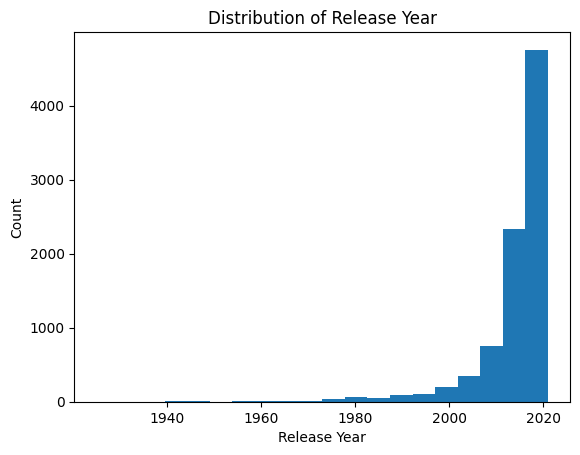

Insight: Most Netflix content was released after 2010.


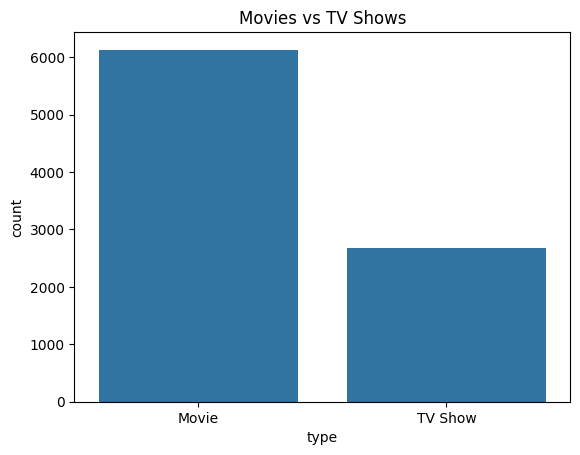

Insight: Movies are more common than TV Shows on Netflix.


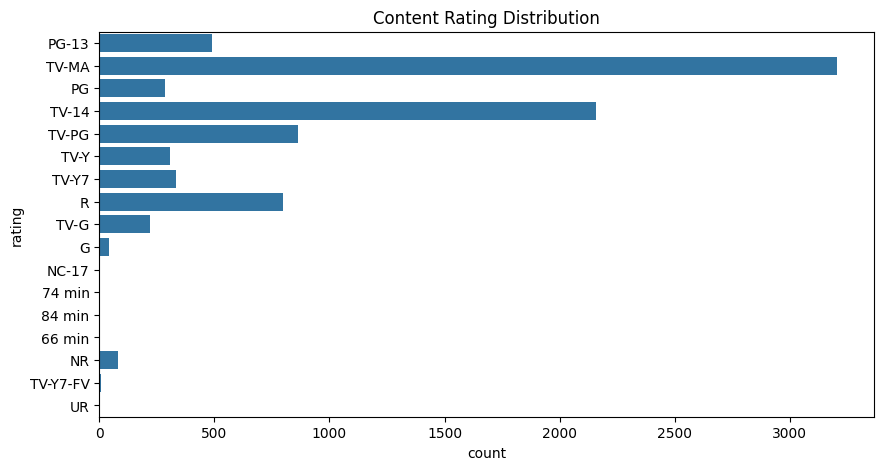

Insight: TV-MA and TV-14 are the most frequent ratings.


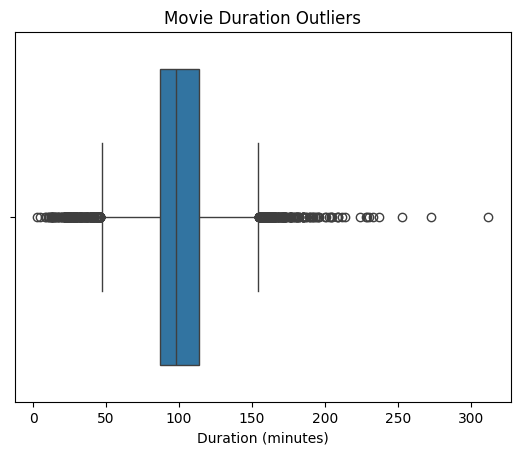

Insight: Some movies have unusually long durations (outliers).


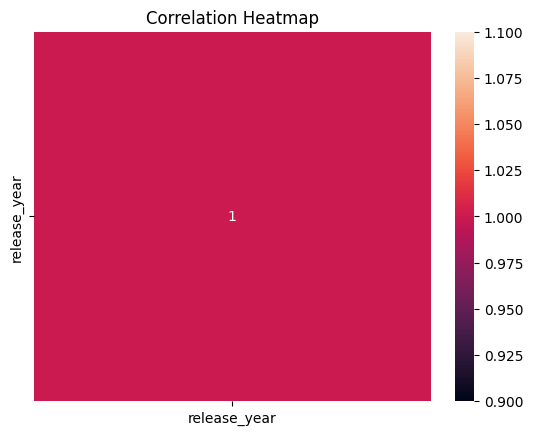

Insight: Only one numerical feature, so limited correlation analysis.

Important Features for Prediction:
- type
- rating
- release_year
- duration
- listed_in

Final Summary:
- Netflix content increased rapidly after 2010
- Movies dominate the platform
- Mature ratings are most common
- Movie durations contain outliers
- Dataset is mostly categorical


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("netflix_titles.csv")
print("First 5 Rows")
print(df.head())

print("\nDataset Info")
print(df.info())

plt.figure()
plt.hist(df['release_year'], bins=20)
plt.title("Distribution of Release Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

print("Insight: Most Netflix content was released after 2010.")
plt.figure()
sns.countplot(x='type', data=df)
plt.title("Movies vs TV Shows")
plt.show()

print("Insight: Movies are more common than TV Shows on Netflix.")

plt.figure(figsize=(10,5))
sns.countplot(y='rating', data=df)
plt.title("Content Rating Distribution")
plt.show()

print("Insight: TV-MA and TV-14 are the most frequent ratings.")

movies = df[df['type'] == 'Movie'].copy()
movies['duration'] = movies['duration'].str.replace(' min', '')
movies['duration'] = pd.to_numeric(movies['duration'], errors='coerce')

plt.figure()
sns.boxplot(x=movies['duration'])
plt.title("Movie Duration Outliers")
plt.xlabel("Duration (minutes)")
plt.show()

print("Insight: Some movies have unusually long durations (outliers).")

numerical_df = df[['release_year']]

plt.figure()
sns.heatmap(numerical_df.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

print("Insight: Only one numerical feature, so limited correlation analysis.")

important_features = [
    'type',
    'rating',
    'release_year',
    'duration',
    'listed_in'
]

print("\nImportant Features for Prediction:")
for feature in important_features:
    print("-", feature)

print("\nFinal Summary:")
print("- Netflix content increased rapidly after 2010")
print("- Movies dominate the platform")
print("- Mature ratings are most common")
print("- Movie durations contain outliers")
print("- Dataset is mostly categorical")
